In [61]:
%load_ext autoreload
%autoreload 2

Imports


In [62]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import utils

## Analyse de la correlation entre les statistiques des équipes et le nombre de victoire le rang

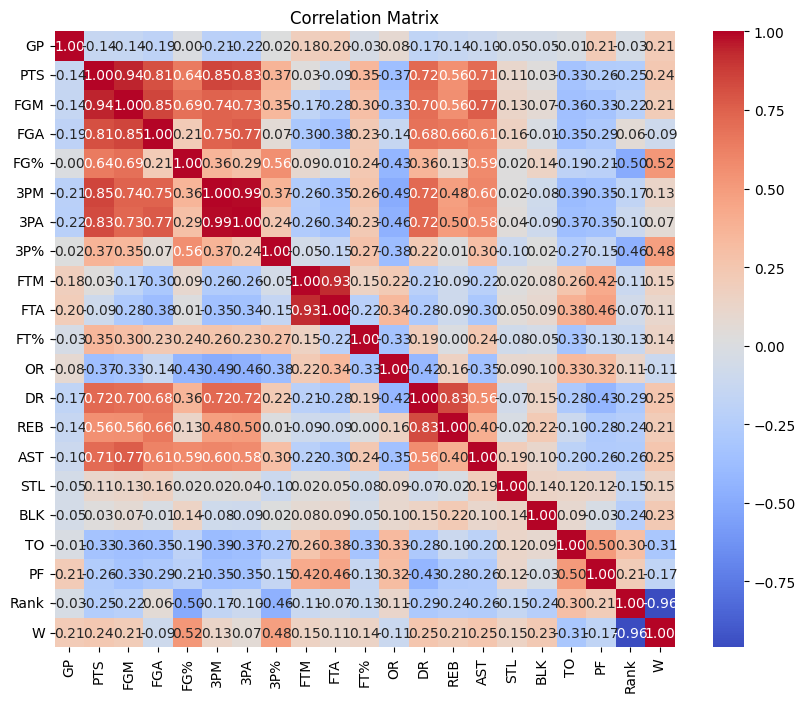

C:\Users\NeilB\AppData\Local\Temp\ipykernel_26676\4156847377.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




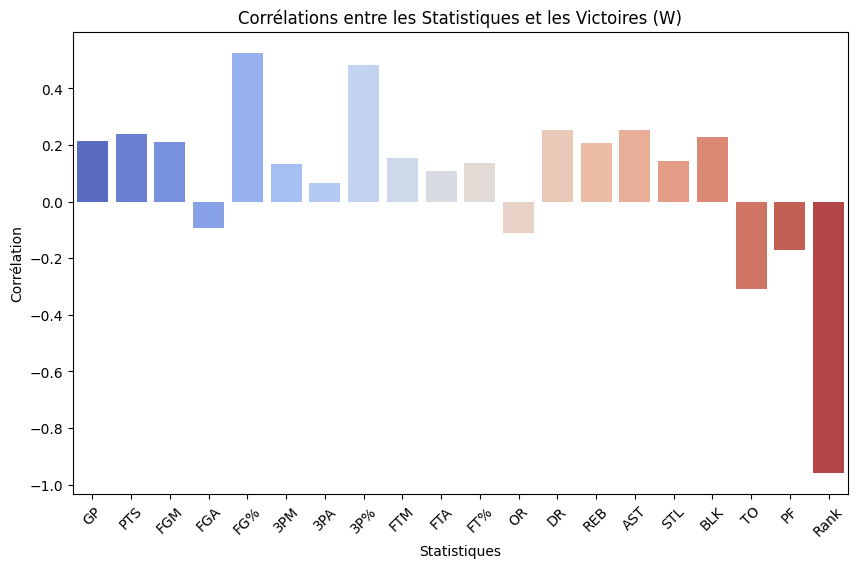

C:\Users\NeilB\AppData\Local\Temp\ipykernel_26676\4156847377.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




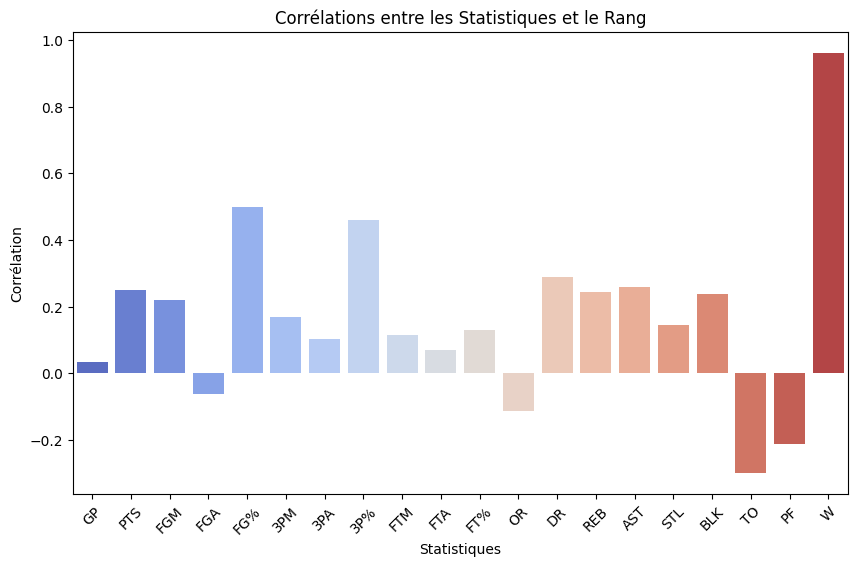

In [84]:
# Charger les données team_stats et standings
team_stats_path = "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv"
standings_path = "../data/standings/NBA-Standings-Regular-Season-{}.csv"

team_stats = utils.load_all_data_teams(team_stats_path,2002)
standings = utils.load_all_data_teams(standings_path,2002)

# Renommer les colonnes pour correspondre
team_stats = team_stats.rename(columns={'Team Name': 'Team'})
standings = standings.rename(columns={'Team Name': 'Team'})

# Joindre les deux jeux de données sur les colonnes Team et Year
combined_df = pd.merge(team_stats, standings, on=['Team', 'Year'])

# Sélectionner les colonnes d'intérêt
columns_of_interest_stats = ['GP','PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OR','DR','REB','AST','STL','BLK','TO','PF']
column_of_interest_standing = ['L','PCT','GB','PPG','OPP PPG','DIFF','HOME-W','HOME-L','AWAY-W','AWAY-L','DIV-W','DIV-L','CONF-W','CONF-L','Last10-W','Last10-L']
column_of_must_have = ['Rank' , 'W']
#columns_of_interest += column_of_interest_standing
selected_columns_df = combined_df[columns_of_interest_stats + column_of_must_have]

# Calculer les corrélations
correlation_matrix = selected_columns_df.corr()

# Afficher les corrélations sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Bar plot des corrélations entre les statistiques et les victoires (W)
correlation_with_w = correlation_matrix['W'].drop('W')
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_w.index, y=correlation_with_w.values, palette='coolwarm')
plt.title('Corrélations entre les Statistiques et les Victoires (W)')
plt.xlabel('Statistiques')
plt.ylabel('Corrélation')
plt.xticks(rotation=45)
plt.show()

# Bar plot des corrélations entre les statistiques et les victoires (W)
correlation_with_rank = correlation_matrix['Rank'].drop('Rank')
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_rank.index, y=-1*correlation_with_rank.values, palette='coolwarm')
plt.title('Corrélations entre les Statistiques et le Rang')
plt.xlabel('Statistiques')
plt.ylabel('Corrélation')
plt.xticks(rotation=45)
plt.show()

## Analyse de la correlation entre les statistiques des équipes et le nombre de victoire et le rang

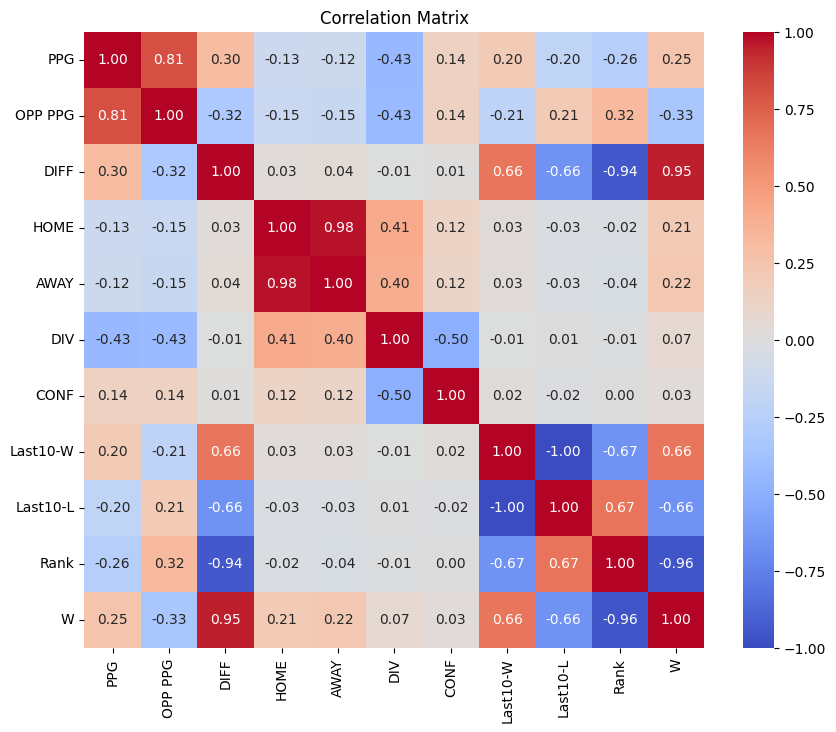

C:\Users\NeilB\AppData\Local\Temp\ipykernel_26676\3740657410.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_w.index, y=correlation_with_w.values, palette='coolwarm')


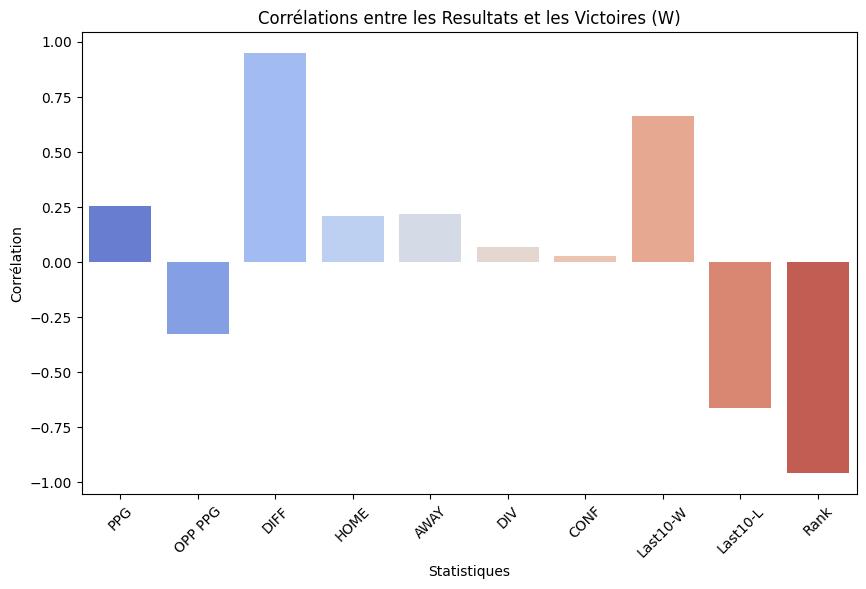

C:\Users\NeilB\AppData\Local\Temp\ipykernel_26676\3740657410.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_rank.index, y=-1*correlation_with_rank.values, palette='coolwarm')


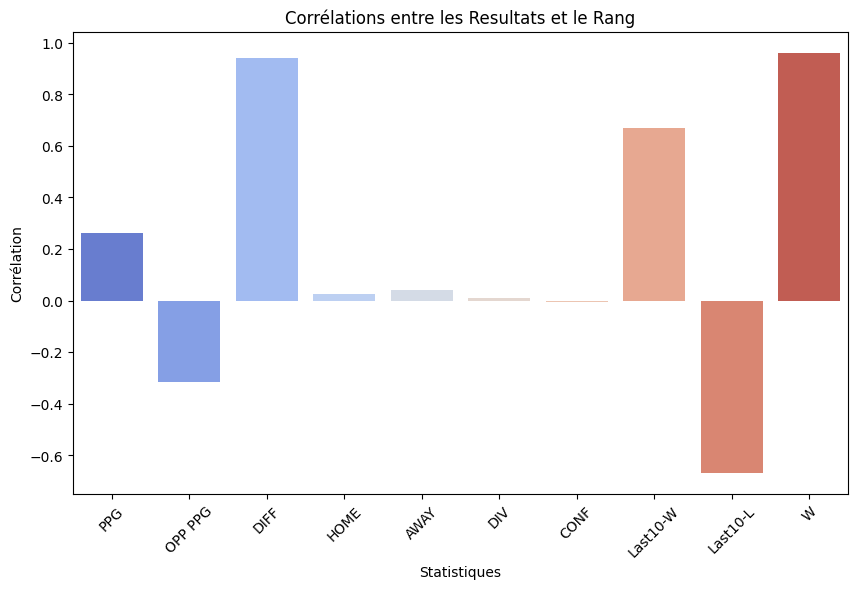

In [66]:
# Sélectionner les colonnes d'intérêt
columns_of_interest_stats = ['GP','PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OR','DR','REB','AST','STL','BLK','TO','PF']
column_of_interest_standing = ['PPG','OPP PPG','DIFF','HOME','AWAY','DIV','CONF','Last10-W','Last10-L']
column_of_must_have = ['Rank' , 'W']
#columns_of_interest += column_of_interest_standing
combined_df['HOME'] = combined_df['HOME-W'] +  combined_df['HOME-L']
combined_df['AWAY'] = combined_df['AWAY-W'] +  combined_df['AWAY-L']
combined_df['DIV'] = combined_df['DIV-W'] +  combined_df['DIV-L']
combined_df['CONF'] = combined_df['CONF-W'] +  combined_df['CONF-L']


selected_columns_df = combined_df[column_of_interest_standing + column_of_must_have]
# Calculer les corrélations
correlation_matrix = selected_columns_df.corr()

# Afficher les corrélations sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Bar plot des corrélations entre les statistiques et les victoires (W)
correlation_with_w = correlation_matrix['W'].drop('W')
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_w.index, y=correlation_with_w.values, palette='coolwarm')
plt.title('Corrélations entre les Resultats et les Victoires (W)')
plt.xlabel('Statistiques')
plt.ylabel('Corrélation')
plt.xticks(rotation=45)
plt.show()

# Bar plot des corrélations entre les statistiques et les victoires (W)
correlation_with_rank = correlation_matrix['Rank'].drop('Rank')
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_rank.index, y=-1*correlation_with_rank.values, palette='coolwarm')
plt.title('Corrélations entre les Resultats et le Rang')
plt.xlabel('Statistiques')
plt.ylabel('Corrélation')
plt.xticks(rotation=45)
plt.show()

##  Analyse sur l'impact  

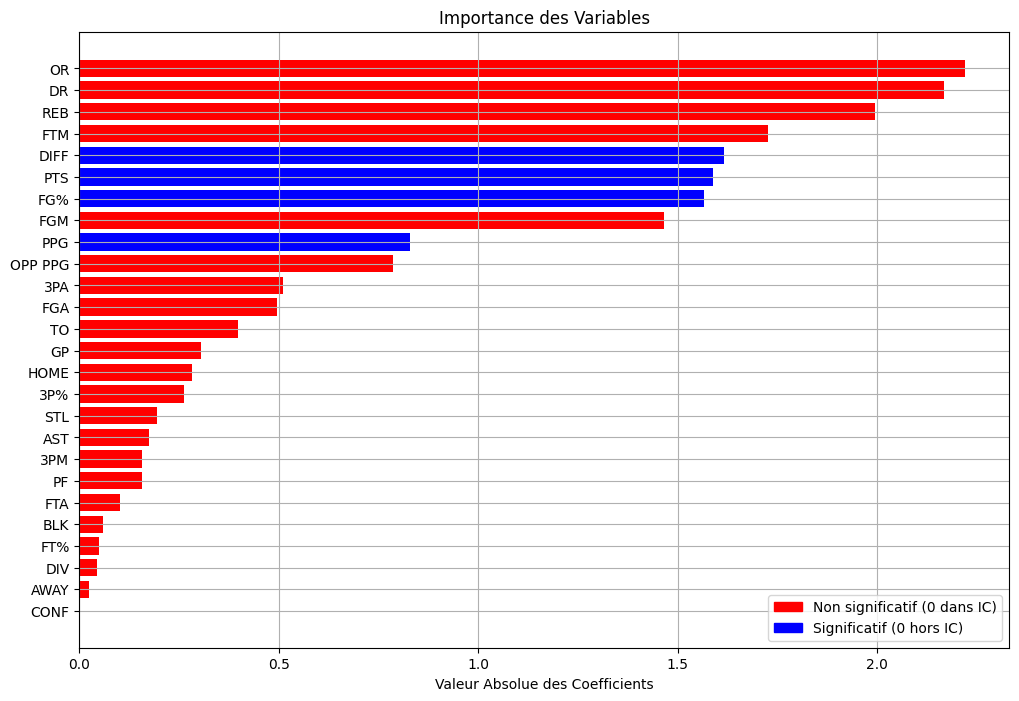

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     349.7
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        21:35:34   Log-Likelihood:                -1560.6
No. Observations:                 611   AIC:                             3171.
Df Residuals:                     586   BIC:                             3281.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.4415     79.289     -0.750      0.4

In [67]:
import statsmodels.api as sm

columns_of_interest_stats = ['GP','PTS','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OR','DR','REB','AST','STL','BLK','TO','PF']
column_of_interest_standing = ['PPG','OPP PPG','DIFF','HOME','AWAY','DIV','CONF']
columns_to_include = columns_of_interest_stats + column_of_interest_standing
X = combined_df[columns_to_include]
y = combined_df['W']

# Ajouter une constante (intercept) pour la régression
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire
model = sm.OLS(y, X).fit()

utils.plot_variable_importance(model)
# Résumé du modèle
print(model.summary())


### Interpretation des  résultats : 
####  Coefficients et Significativité des Variables:
coef: Les coefficients de régression. Ils représentent l'impact moyen d'une unité de changement de la variable indépendante sur la variable dépendante, en tenant compte des autres   variables.  
std err: L'erreur standard du coefficient.  
t: La statistique t, utilisée pour tester si un coefficient est significativement différent de zéro.  
P>|t|: La valeur p associée à la statistique t. Une valeur p inférieure à 0.05 indique que le coefficient est statistiquement significatif.  

#### Interprétation des Coefficients
const: Coefficient constant. Non significatif ici.  
GP (Games Played): Coefficient de 0.3063, très significatif (P < 0.05). Plus une équipe joue de matchs, plus elle a de victoires.      
PTS (Points): Coefficient de -1.5871, non significatif. Indique que d'autres variables expliquent mieux les victoires que les points marqués seuls.    
FGM (Field Goals Made): Coefficient de 1.4644, non significatif.   
FGA (Field Goals Attempted): Coefficient de 0.4947, non significatif.   
FG% (Field Goal Percentage): Coefficient de 1.5646, non significatif.  
3PM (Three Points Made): Coefficient de 0.1583, non significatif.  
3PA (Three Points Attempted): Coefficient de 0.5103, non significatif.  
3P% (Three Point Percentage): Coefficient de 0.2632, non significatif.  
FTM (Free Throws Made): Coefficient de 1.7267, non significatif.  
FTA (Free Throws Attempted): Coefficient de -0.1014, non significatif.  
FT% (Free Throw Percentage): Coefficient de -0.0485, non significatif.    
OR (Offensive Rebounds): Coefficient de 2.2195, non significatif.   
DR (Defensive Rebounds): Coefficient de 2.1673, non significatif.    
REB (Total Rebounds): Coefficient de -1.9941, non significatif.  
AST (Assists): Coefficient de 0.1756, presque significatif (P = 0.073). Pourrait indiquer que plus de passes décisives tendent à augmenter les victoires.  
STL (Steals): Coefficient de 0.1953, non significatif.  
BLK (Blocks): Coefficient de -0.0586, non significatif.    
TO (Turnovers): Coefficient de -0.3968, significatif (P < 0.05). Plus de pertes de balle tendent à réduire le nombre de victoires.  
PF (Personal Fouls): Coefficient de -0.1565, non significatif.    
PPG (Points Per Game): Coefficient de 0.8294, très significatif (P < 0.05). Indique que marquer plus de points par match tend à augmenter les victoires.  
OPP PPG (Opponent Points Per Game): Coefficient de -0.7854, très significatif (P < 0.05). Permettre moins de points par match à l'adversaire tend à augmenter les victoires.  
DIFF (Point Differential): Coefficient de 1.6148, très significatif (P < 0.05). Un plus grand écart de points en faveur de l'équipe augmente les victoires.  
HOME (Home Wins): Coefficient de 0.2831, non significatif.  
AWAY (Away Wins): Coefficient de 0.0233, non significatif.  
DIV (Division Wins): Coefficient de 0.0456, non significatif.  
CONF (Conference Wins): Coefficient de -0.0030, non significatif.  


#### Résumé : 
GP (Games Played) 
TO (Turnovers)  
PPG (Points Per Game)  
OPP PPG (Opponent Points Per Game)  
DIFF (Point Differential)GP (Games Played)  
TO (Turnovers)   
PPG (Points Per Game)   
OPP PPG (Opponent Points Per Game)
DIFF (Point Differential)  



#### Note on remarque que  trop  d'informations sont perdu a cause de certaines colonnes comme le nombre de points qui  influe  logiquement beacoup trop sur le taux de victoire, on essayera donc d'enlever toutes les colonnes  trop significative de victoire

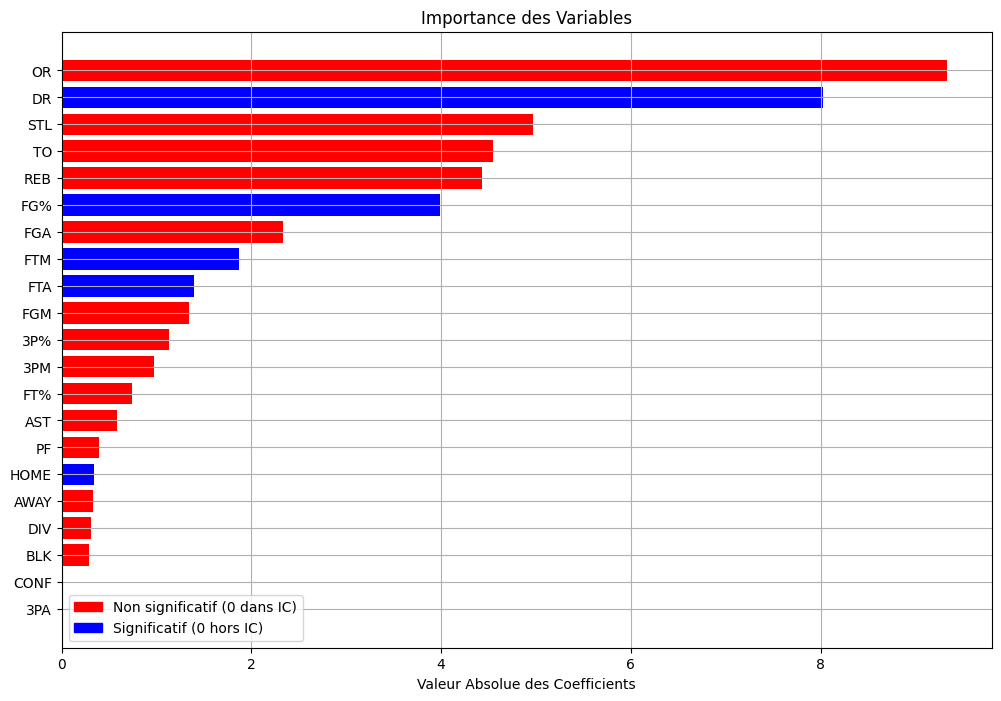

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     96.84
Date:                Thu, 23 May 2024   Prob (F-statistic):          2.55e-175
Time:                        21:35:34   Log-Likelihood:                -1938.0
No. Observations:                 611   AIC:                             3920.
Df Residuals:                     589   BIC:                             4017.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -196.3415    140.159     -1.401      0.1

In [68]:
columns_of_interest_stats = ['FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OR','DR','REB','AST','STL','BLK','TO','PF']
column_of_interest_standing = ['HOME','AWAY','DIV','CONF']
columns_to_include = columns_of_interest_stats + column_of_interest_standing
X = combined_df[columns_to_include]
y = combined_df['W']

# Ajouter une constante (intercept) pour la régression
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire
model = sm.OLS(y, X).fit()

utils.plot_variable_importance(model)
# Résumé du modèle
print(model.summary())

### Autres maniére de trouver quelles variables ne pas prendre en compte : 

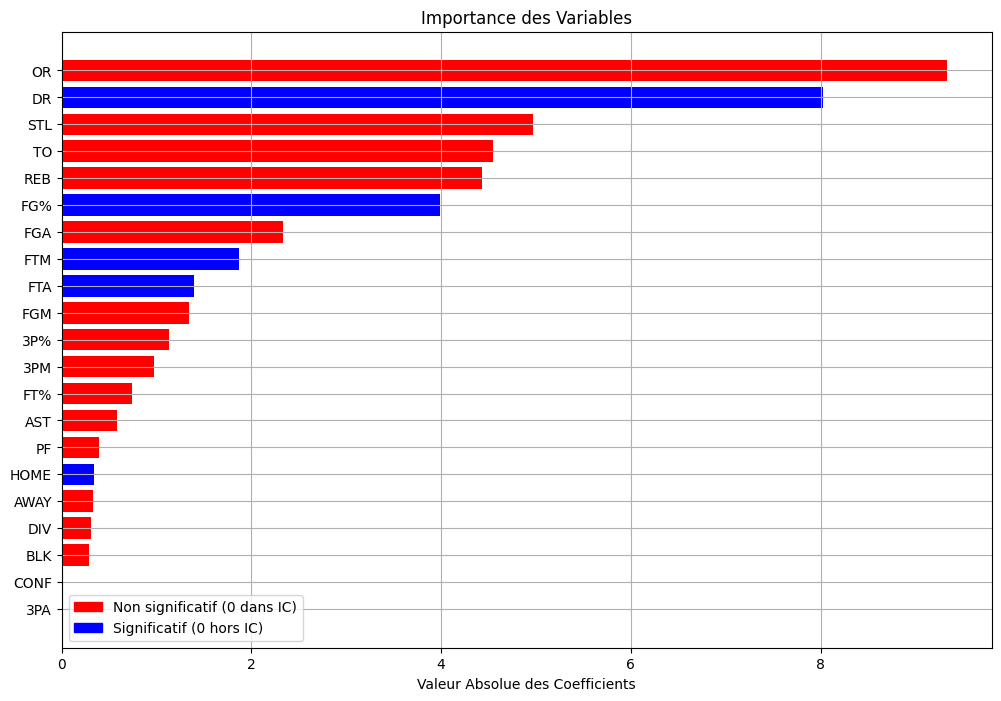

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     96.84
Date:                Thu, 23 May 2024   Prob (F-statistic):          2.55e-175
Time:                        21:35:34   Log-Likelihood:                -1938.0
No. Observations:                 611   AIC:                             3920.
Df Residuals:                     589   BIC:                             4017.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -196.3415    140.159     -1.401      0.1

In [69]:
columns_of_interest_stats = ['FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OR','DR','REB','AST','STL','BLK','TO','PF']
column_of_interest_standing = ['HOME','AWAY','DIV','CONF']
columns_to_include = columns_of_interest_stats + column_of_interest_standing
X = combined_df[columns_to_include]
y = combined_df['W']

# Ajouter une constante (intercept) pour la régression
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Plot 

utils.plot_variable_importance(model)
# Résumé du modèle
print(model.summary())

#### Analyse de la Régression OLS sur les Victoires

### Aperçu Global des Résultats de la Régression OLS

- **Dep. Variable**: La variable dépendante, ici `W` (nombre de victoires).
- **R-squared**: Le coefficient de détermination, ici 0.775, ce qui signifie que 77.5% de la variance dans le nombre de victoires est expliquée par les variables indépendantes incluses dans le modèle.
- **Adj. R-squared**: Le R-squared ajusté, ici 0.767, qui tient compte du nombre de variables dans le modèle. Cela signifie que le modèle reste très explicatif même après ajustement.
- **F-statistic**: La statistique F, ici 96.84, indique la significativité globale du modèle. La valeur P associée est très petite (2.55e-175), suggérant que le modèle est significatif.
- **Prob (F-statistic)**: La probabilité que la statistique F soit aussi extrême par hasard. Ici, c'est pratiquement 0, indiquant que le modèle est significatif.
- **Log-Likelihood**: La log-vraisemblance du modèle.
- **No. Observations**: Le nombre d'observations, ici 611.
- **AIC et BIC**: Critères d'information d'Akaike et bayésien. Plus ces valeurs sont basses, mieux c'est.

### Coefficients et Significativité des Variables

### Interprétation des Coefficients

- **const**: Coefficient constant de -196.3415, non significatif (P = 0.162 taux de confiance bas) . 
- **FGM (Field Goals Made)**: Coefficient de -1.3458, non significatif (P = 0.702 taux de confiance bas).
- **FGA (Field Goals Attempted)**: Coefficient de -2.3285, non significatif (P = 0.149 taux de confiance bas).
- **FG% (Field Goal Percentage)**: Coefficient de 3.9854, non significatif (P = 0.176 taux de confiance bas).
- **3PM (Three Points Made)**: Coefficient de 0.9773, non significatif (P = 0.576 taux de confiance bas).
- **3PA (Three Points Attempted)**: Coefficient de 0.0048, non significatif (P = 0.994 taux de confiance bas).
- **3P% (Three Point Percentage)**: Coefficient de 1.1285, significatif (P = 0.005). Indique que plus le pourcentage de réussite aux tirs à trois points est élevé, plus le nombre de victoires est élevé.
- **FTM (Free Throws Made)**: Coefficient de -1.8702, non significatif (P = 0.507 taux de confiance bas).
- **FTA (Free Throws Attempted)**: Coefficient de 1.3935, non significatif (P = 0.518 taux de confiance bas).
- **FT% (Free Throw Percentage)**: Coefficient de 0.7385, non significatif (P = 0.280 taux de confiance bas).
- **OR (Offensive Rebounds)**: Coefficient de 9.3377, presque significatif (P = 0.051). Plus les rebonds offensifs sont nombreux, plus le nombre de victoires est élevé.
- **DR (Defensive Rebounds)**: Coefficient de 8.0237, presque significatif (P = 0.091). Plus les defensif offensifs sont nombreux, plus le nombre de victoires est élevé.
- **REB (Total Rebounds)**: Coefficient de -4.4294, non significatif (P = 0.351 taux de confiance bas).
- **AST (Assists)**: Coefficient de 0.5833, significatif (P = 0.001). Plus les passes décisives sont nombreuses, plus le nombre de victoires est élevé.
- **STL (Steals)**: Coefficient de 4.9678, très significatif (P < 0.001). Plus les interceptions sont nombreuses, plus le nombre de victoires est élevé.
- **BLK (Blocks)**: Coefficient de 0.2918, non significatif (P = 0.388 taux de confiance bas).
- **TO (Turnovers)**: Coefficient de -4.5483, très significatif (P < 0.001). Plus les pertes de balle sont nombreuses, moins le nombre de victoires est élevé.
- **PF (Personal Fouls)**: Coefficient de 0.3885, presque significatif (P = 0.051). Plus on empeche des bonnes actions en faisant des erreurs mieux on a de chance de ne pas perdre
- **HOME (Home Wins)**: Coefficient de 0.3400, non significatif (P = 0.481).
- **AWAY (Away Wins)**: Coefficient de 0.3272, non significatif (P = 0.489).
- **DIV (Division Wins)**: Coefficient de 0.3112, significatif (P = 0.015). Plus les victoires de division sont nombreuses, plus le nombre de victoires est élevé.
- **CONF (Conference Wins)**: Coefficient de 0.0157, non significatif (P = 0.569).


### Interprétation Générale   
Les variables significatives qui semblent avoir le plus d'impact sur les victoires sont :  

- **3P% (Three Point Percentage)**
- **AST (Assists)**
- **STL (Steals)**
- **TO (Turnovers)**
- **DIV (Division Wins)** 
Les autres variables, bien que non significatives individuellement, peuvent toujours contribuer collectivement à la prédiction des victoires.  

Conclusion  
En résumé, bien que certaines variables aient des impacts évidents et significatifs (comme les passes décisives, les interceptions et les pertes de balle), d'autres peuvent offrir des insights supplémentaires.

## Memes analyses pour le rang

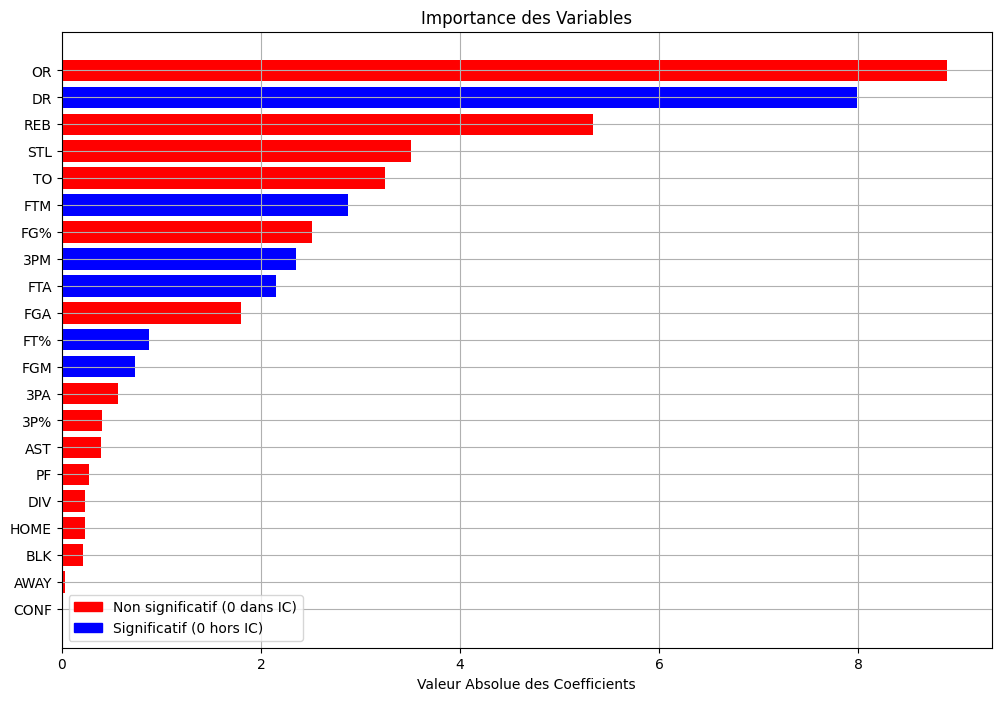

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     73.57
Date:                Fri, 24 May 2024   Prob (F-statistic):          3.21e-149
Time:                        00:57:58   Log-Likelihood:                -1791.2
No. Observations:                 611   AIC:                             3626.
Df Residuals:                     589   BIC:                             3724.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.6555    110.221      1.394      0.1

In [72]:
columns_of_interest_stats = ['FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','OR','DR','REB','AST','STL','BLK','TO','PF']
column_of_interest_standing = ['HOME','AWAY','DIV','CONF']
columns_to_include = columns_of_interest_stats + column_of_interest_standing
X = combined_df[columns_to_include]
y = combined_df['Rank']

# Ajouter une constante (intercept) pour la régression
X = sm.add_constant(X)

# Ajuster le modèle de régression linéaire
model = sm.OLS(y, X).fit()

utils.plot_variable_importance(model)
# Résumé du modèle
print(model.summary())

 ### Coefficients et leur Signification

**const (Constante)**: 153.6555 (non significatif, p=0.164)

- Cela représente l'ordonnée à l'origine du modèle lorsque toutes les variables indépendantes sont à zéro.

**FGM (Field Goals Made)**: 0.7366 (non significatif, p=0.790)

- Une augmentation d'une unité des paniers marqués est associée à une augmentation de 0.7366 dans le rang, mais ce n'est pas significatif.

**FGA (Field Goals Attempted)**: 1.8021 (non significatif, p=0.156)

- Une augmentation d'une unité des tentatives de tir est associée à une augmentation de 1.8021 dans le rang, mais ce n'est pas significatif.

**FG% (Field Goal Percentage)**: -2.5176 (non significatif, p=0.276)

- Une augmentation de 1% dans le pourcentage de tir est associée à une diminution de 2.5176 dans le rang, mais ce n'est pas significatif.

**3PM (Three-Point Made)**: -2.3548 (presque significatif, p=0.087)

- Une augmentation d'une unité des paniers à trois points est associée à une diminution de 2.3548 dans le rang, proche de la significativité.

**3PA (Three-Point Attempted)**: 0.5680 (non significatif, p=0.249)

- Une augmentation d'une unité des tentatives à trois points est associée à une augmentation de 0.5680 dans le rang, mais ce n'est pas significatif.

**3P% (Three-Point Percentage)**: -0.4019 (non significatif, p=0.199)

- Une augmentation de 1% dans le pourcentage à trois points est associée à une diminution de 0.4019 dans le rang, mais ce n'est pas significatif.

**FTM (Free Throws Made)**: 2.8743 (non significatif, p=0.195)

- Une augmentation d'une unité des lancers francs marqués est associée à une augmentation de 2.8743 dans le rang, mais ce n'est pas significatif.

**FTA (Free Throws Attempted)**: -2.1557 (non significatif, p=0.203)

- Une augmentation d'une unité des tentatives de lancer franc est associée à une diminution de 2.1557 dans le rang, mais ce n'est pas significatif.

**FT% (Free Throw Percentage)**: -0.8732 (non significatif, p=0.105)

- Une augmentation de 1% dans le pourcentage de lancer franc est associée à une diminution de 0.8732 dans le rang, mais ce n'est pas significatif.

**OR (Offensive Rebounds)**: -8.8931 (significatif, p=0.018)

- Une augmentation d'une unité des rebonds offensifs est associée à une diminution de 8.8931 dans le rang, ce qui est significatif.

**DR (Defensive Rebounds)**: -7.9806 (significatif, p=0.033)

- Une augmentation d'une unité des rebonds défensifs est associée à une diminution de 7.9806 dans le rang, ce qui est significatif.

**REB (Total Rebounds)**: 5.3329 (non significatif, p=0.153)

- Une augmentation d'une unité des rebonds totaux est associée à une augmentation de 5.3329 dans le rang, mais ce n'est pas significatif.

**AST (Assists)**: -0.3931 (significatif, p=0.005)

- Une augmentation d'une unité des passes décisives est associée à une diminution de 0.3931 dans le rang, ce qui est significatif.

**STL (Steals)**: -3.5060 (très significatif, p=0.000)

- Une augmentation d'une unité des interceptions est associée à une diminution de 3.5060 dans le rang, ce qui est très significatif.

**BLK (Blocks)**: -0.2127 (non significatif, p=0.424)

- Une augmentation d'une unité des contres est associée à une diminution de 0.2127 dans le rang, mais ce n'est pas significatif.

**TO (Turnovers)**: 3.2448 (très significatif, p=0.000)

- Une augmentation d'une unité des pertes de balle est associée à une augmentation de 3.2448 dans le rang, ce qui est très significatif.

**PF (Personal Fouls)**: -0.2744 (presque significatif, p=0.080)

- Une augmentation d'une unité des fautes personnelles est associée à une diminution de 0.2744 dans le rang, proche de la significativité.

**HOME (Home Wins)**: 0.2308 (non significatif, p=0.543)

- Une augmentation d'une unité des victoires à domicile est associée à une augmentation de 0.2308 dans le rang, mais ce n'est pas significatif.

**AWAY (Away Wins)**: -0.0285 (non significatif, p=0.939)

- Une augmentation d'une unité des victoires à l'extérieur est associée à une diminution de 0.0285 dans le rang, mais ce n'est pas significatif.

**DIV (Division Wins)**: -0.2310 (significatif, p=0.021)

- Une augmentation d'une unité des victoires en division est associée à une diminution de 0.2310 dans le rang, ce qui est significatif.

**CONF (Conference Wins)**: -0.0098 (non significatif, p=0.650)

- Une augmentation d'une unité des victoires en conférence est associée à une diminution de 0.0098 dans le rang, mais ce n'est pas significatif.


# Dashboard 

In [146]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import statsmodels.api as sm
import os

# Charger les données team_stats et standings
team_stats_path = "../data/teams_stats/NBA-Team-Regular-Season-Stats-{}.csv"
standings_path = "../data/standings/NBA-Standings-Regular-Season-{}.csv"

team_stats = utils.load_all_data_teams(team_stats_path, 2002)
standings = utils.load_all_data_teams(standings_path, 2002)

# Renommer les colonnes pour correspondre
team_stats = team_stats.rename(columns={'Team Name': 'Team'})
standings = standings.rename(columns={'Team Name': 'Team'})

# Joindre les deux jeux de données sur les colonnes Team et Year
combined_df = pd.merge(team_stats, standings, on=['Team', 'Year'])

# Vérifier si les colonnes 'Rank' et 'W' existent dans combined_df
if 'Rank' not in combined_df.columns or 'W' not in combined_df.columns:
    raise KeyError("Les colonnes 'Rank' ou 'W' ne sont pas présentes dans les données combinées.")

# Sélectionner les colonnes d'intérêt
columns_of_interest_stats = ['GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']
column_of_interest_standing = ['PPG', 'OPP PPG', 'DIFF', 'HOME-W', 'HOME-L', 'AWAY-W', 'AWAY-L', 'DIV-W', 'DIV-L', 'CONF-W', 'CONF-L', 'Last10-W', 'Last10-L']
column_of_must_have = ['Rank', 'W']

# Créer les colonnes combinées
combined_df['HOME'] = combined_df['HOME-W'] + combined_df['HOME-L']
combined_df['AWAY'] = combined_df['AWAY-W'] + combined_df['AWAY-L']
combined_df['DIV'] = combined_df['DIV-W'] + combined_df['DIV-L']
combined_df['CONF'] = combined_df['CONF-W'] + combined_df['CONF-L']

selected_columns_df_stats = combined_df[columns_of_interest_stats + column_of_must_have]
selected_columns_df_standing = combined_df[column_of_interest_standing + ['HOME', 'AWAY', 'DIV', 'CONF'] + column_of_must_have]

# Créer l'application Dash
app = dash.Dash(__name__)
app.title = "NBA Team Performance Dashboard"

app.layout = html.Div([
    html.Div([
        html.H1("NBA Team Performance Dashboard", style={'textAlign': 'center', 'color': '#FFFFFF', 'marginBottom': '20px'}),
    ], style={'backgroundColor': '#1E1E1E', 'padding': '20px'}),
    html.Div([
        html.Label("Select Year Range:", style={'color': '#FFFFFF', 'marginRight': '20px'}),
        html.Div([
            dcc.RangeSlider(
                id='year-slider',
                min=2002,
                max=2023,
                marks={str(year): str(year) for year in range(2002, 2024)},
                step=1,
                value=[2010, 2022],
                tooltip={"placement": "bottom", "always_visible": True},
                included=True
            ),
        ], style={'width': '80%', 'display': 'inline-block'}),
        html.Label("Select Statistic Type:", style={'color': '#FFFFFF', 'marginLeft': '20px', 'marginRight': '10px'}),
        dcc.Dropdown(
            id='stat-type-dropdown',
            options=[
                {'label': 'Team Stats', 'value': 'team_stats'},
                {'label': 'Standings Stats', 'value': 'standings_stats'}
            ],
            value='team_stats',
            style={'width': '200px', 'display': 'inline-block'}
        ),
    ], style={'display': 'flex', 'flexDirection': 'row', 'alignItems': 'center', 'backgroundColor': '#333333', 'padding': '20px', 'borderRadius': '10px'}),
    html.Div([
        html.Label("Select Variables:", style={'color': '#FFFFFF', 'marginRight': '20px'}),
        dcc.Checklist(
            id='variable-checklist',
            options=[{'label': var, 'value': var} for var in columns_of_interest_stats + column_of_interest_standing],
            value=columns_of_interest_stats,
            inline=True,
            style={'color': '#FFFFFF'}
        ),
    ], style={'margin': '20px'}),
    dcc.Tabs([
        dcc.Tab(label='Correlation Analysis', children=[
            html.Div([
                dcc.Graph(id='correlation-heatmap'),
            ], style={'margin': '20px'}),
            html.Div([
                dcc.Graph(id='correlation-barplot-w'),
            ], style={'margin': '20px'}),
            html.Div([
                dcc.Graph(id='correlation-barplot-rank'),
            ], style={'margin': '20px'}),
        ]),
        dcc.Tab(label='Regression Analysis', children=[
            html.Div([
                dcc.Graph(id='regression-importance-plot'),
            ], style={'margin': '20px', 'backgroundColor': '#2E2E2E', 'padding': '20px', 'borderRadius': '10px'}),
            html.Div(id='regression-legend', style={'margin': '20px', 'backgroundColor': '#2E2E2E', 'padding': '20px', 'borderRadius': '10px', 'color': '#FFFFFF'})
        ]),
    ]),
], style={'width': '80%', 'margin': 'auto', 'backgroundColor': '#2E2E2E', 'padding': '20px', 'borderRadius': '10px'})

@app.callback(
    Output('variable-checklist', 'value'),
    [Input('stat-type-dropdown', 'value')]
)
def set_default_variables(stat_type):
    if stat_type == 'team_stats':
        return columns_of_interest_stats
    else:
        return column_of_interest_standing + ['HOME', 'AWAY', 'DIV', 'CONF']

@app.callback(
    [Output('correlation-heatmap', 'figure'),
     Output('correlation-barplot-w', 'figure'),
     Output('correlation-barplot-rank', 'figure'),
     Output('regression-importance-plot', 'figure'),
     Output('regression-legend', 'children')],
    [Input('year-slider', 'value'),
     Input('stat-type-dropdown', 'value'),
     Input('variable-checklist', 'value')]
)
def update_graphs(selected_years, stat_type, selected_variables):
    start_year, end_year = selected_years

    if stat_type == 'team_stats':
        filtered_df = selected_columns_df_stats[(combined_df['Year'] >= start_year) & (combined_df['Year'] <= end_year)]
        columns_to_include = [col for col in selected_variables if col in columns_of_interest_stats]
    else:
        filtered_df = selected_columns_df_standing[(combined_df['Year'] >= start_year) & (combined_df['Year'] <= end_year)]
        columns_to_include = [col for col in selected_variables if col in column_of_interest_standing + ['HOME', 'AWAY', 'DIV', 'CONF']]

    if filtered_df.empty:
        print(f"No data available for the selected range: {start_year}-{end_year}")
        return {}, {}, {}, {}, []

    # Filtrer les colonnes sélectionnées
    filtered_df = filtered_df[columns_to_include + column_of_must_have]

    correlation_matrix = filtered_df.corr()

    # Heatmap
    heatmap_fig = px.imshow(correlation_matrix, aspect="auto",
                            title=f'Correlation Matrix ({start_year}-{end_year})', color_continuous_scale='RdBu_r', zmin=-1, zmax=1)

    # Bar plot des corrélations avec les victoires (W)
    correlation_with_w = correlation_matrix['W'].drop('W')
    barplot_w_fig = go.Figure()
    barplot_w_fig.add_trace(go.Bar(
        x=correlation_with_w.index,
        y=correlation_with_w.values,
        marker_color=correlation_with_w.values,
        marker_colorscale='RdBu_r',
        hovertemplate='%{x}: %{y:.2f}<extra></extra>',
    ))
    barplot_w_fig.update_layout(title='Corrélations entre les Statistiques et les Victoires (W)',
                                xaxis_title='Statistiques',
                                yaxis_title='Corrélation',
                                coloraxis_showscale=True)

    # Bar plot des corrélations avec le rang (Rank)
    correlation_with_rank = correlation_matrix['Rank'].drop('Rank')
    barplot_rank_fig = go.Figure()
    barplot_rank_fig.add_trace(go.Bar(
        x=correlation_with_rank.index,
        y=-1 * correlation_with_rank.values,
        marker_color=-1 * correlation_with_rank.values,
        marker_colorscale='RdBu_r',
        hovertemplate='%{x}: %{y:.2f}<extra></extra>',
    ))
    barplot_rank_fig.update_layout(title='Corrélations entre les Statistiques et le Rang',
                                   xaxis_title='Statistiques',
                                   yaxis_title='Corrélation',
                                   coloraxis_showscale=True)

    # Regression Analysis
    X = filtered_df[columns_to_include]
    y = filtered_df['Rank']

    # Ajouter une constante (intercept) pour la régression
    X = sm.add_constant(X, has_constant='add')

    # Ajuster le modèle de régression linéaire
    model = sm.OLS(y, X).fit()

    # Importance des Variables (Basé sur les Coefficients Absolus)
    params = model.params.drop('const', errors='ignore')
    pvalues = model.pvalues.drop('const', errors='ignore')
    importance = params.abs()

    # Définir les couleurs basées sur les p-values
    colors = ['#d62728' if p < 0.01 else '#1f77b4' if p < 0.05 else '#2ca02c' for p in pvalues]

    importance_fig = go.Figure()
    importance_fig.add_trace(go.Bar(
        x=importance.index,
        y=importance.values,
        marker_color=colors,
        text=[f'p-value: {pv:.4f}' for pv in pvalues.values],
        hovertemplate='%{x}: %{y:.2f}<br>%{text}<extra></extra>',
    ))
    importance_fig.update_layout(title='Importance des Variables (Régression)',
                                 xaxis_title='Variables',
                                 yaxis_title='Valeur Absolue des Coefficients',
                                 coloraxis_showscale=False)

    # Légende
    legend = html.Div([
        html.Span("Légende:", style={'fontWeight': 'bold', 'color': '#FFFFFF'}),
        html.Div([
            html.Span("p < 0.01", style={'color': '#d62728'}),
            html.Span(" - Très significatif", style={'color': '#FFFFFF', 'marginLeft': '10px'})
        ]),
        html.Div([
            html.Span("0.01 <= p < 0.05", style={'color': '#1f77b4'}),
            html.Span(" - Modérément significatif", style={'color': '#FFFFFF', 'marginLeft': '10px'})
        ]),
        html.Div([
            html.Span("p >= 0.05", style={'color': '#2ca02c'}),
            html.Span(" - Non significatif", style={'color': '#FFFFFF', 'marginLeft': '10px'})
        ])
    ])

    return heatmap_fig, barplot_w_fig, barplot_rank_fig, importance_fig, legend

if __name__ == '__main__':
    app.run_server(debug=True)
